# Project 7: Machine Learning using Simple Linear Regression 
## Project Summary:
- **Author** Derek Graves
- **Date** 22 Feb 2024
- **GitHub Repository** https://github.com/dgraves4/datafun-07-ml
- **Purpose** This project is a series of guided learning exercises that serve to showcase the use of machine learning, and in particular, a simple type of supervised machine learning called simple linear regression to build a model, make predictions, visualize the model, and publish insights about the final product. 

## Environment Setup
This section provides a setup of the project through creating a virtual environment and installing required packages. See the Project README for detailed step-by-step instructions.

### Import Dependencies

In [356]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np



## Part- 1 Chart a Straight Line

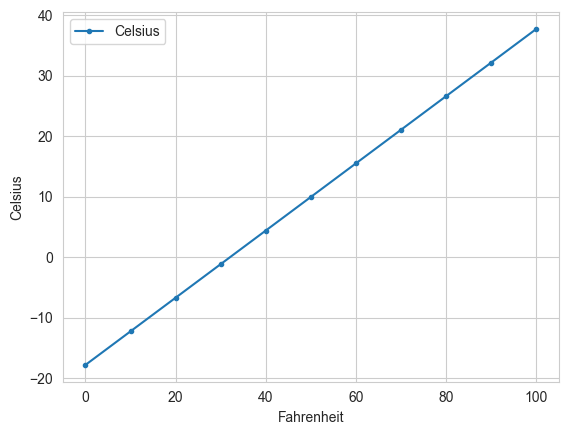

In [357]:
# Lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5/9*(f-32)

# Tupule data for temps 0-100 in 10 degree increments.
temps = temps = [(f, c(f)) for f in range(0, 101, 10)]

# Place the data in a DataFrame
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Set axis and use plot method to display relationship between Farenheit and Celsius temps 
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part- 2 Predict Avg High Temp in NYC in Juanuary 

### Section 1 - Data Acquisition

Load the New York City data from ave_hi_nyc_jan_1895-2018.csv and observe the DataFrame's head and tail:

In [358]:
nyc_df = pd.read_csv('C:/Users/derek/OneDrive/Documents/44608 Data Analytics Fundamentals/Mod 7/datafun-07-ml/Examples/ch10/ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

Display the head and tail of the Dataframe:

In [359]:
# Display DataFrame head: 
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [360]:
# Display DataFrame tail:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Rename the 'Value' column as 'Temperature' for readability:

In [361]:
# Rename 'Value' column
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Display change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [362]:
# Check column type
nyc_df.Date.dtype 

dtype('int64')

Make x-axis more readable by removing 01 (January).  Call Series method floordiv to perform integer division on every element:

In [363]:
nyc_df.Date = nyc_df.Date.floordiv(100)

#Display head to verify change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4: Descriptive Statistics

Set the display precision and get some quick statistics by calling describe on Temperature column:

In [364]:
# Set display precision to 2 decimal places 
pd.set_option('display.precision', 2)

# Use describe() to get basic discriptive statistics and data types
nyc_df.describe()
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model 

Use the SciPy stats module linregress to calculate slope and intercept for the best fit line through the data:

In [365]:
# Calculate regression line's slope and intercept
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

# View linegress slope and intercept values
linear_regression.slope

linear_regression.intercept



8.694993233674289

In [366]:
# View slope value
linear_regression.slope

0.014771361132966163

In [367]:
# View intercept value
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

Using the model, predict the "average high temp in Jan" for the year 2024:

In [368]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

We can also use the model to predict the "average high temp in Jan" for the year 1890:

In [369]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7: Visualizations

Use Seaborn to generate a scatterplot of the data with a best fit line:

(10.0, 70.0)

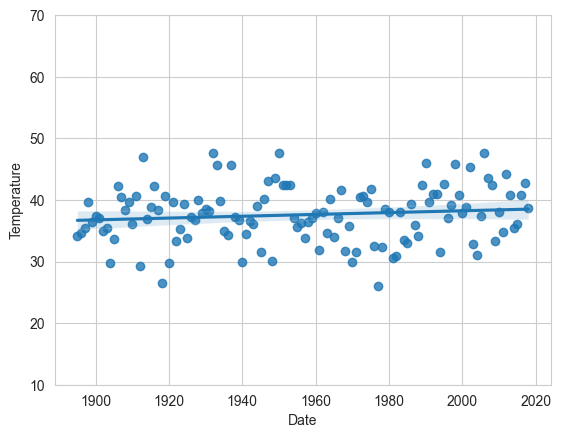

In [370]:
# Configure Seaborn to use 'whitegrid' style
sns.set_style('whitegrid')

# Define x and y axis
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

# Scale y axis range to emphasize linear relationship
axes.set_ylim(10, 70)